# SECOND ASSIGNMENT: PREDICTING EMPLOYEE ATTRITION/BURNOUT
## Carlos Fernández Pascual

For choosing the datasets for the problem, the student ID for Carlos Fernández Pascual was employed, 100535558. As the last two digits are $a=5$ and $b=8$, xx$=a+b=13$. This student ID was also used as a seed for ensuring reproducibility when executing the code in succesive instances.

In [ ]:
seed=100535558

The first step is to import the packages needed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix
from scipy.stats import randint as sp_randint
from scipy.stats import uniform


The next step is to give access to Google Drive. This way, the necessary files stored there can be accessed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### **1. SIMPLIFIED EDA**

**Do a simplified EDA, mainly to determine how many features and instances there are, which variables are categorical/numerical, if there are categorical variables with high cardinality, which features have missing values and how many, whether there are constant columns or ID columns, and whether it is a regression or classification problem. If the latter, is it imbalanced? You can explore other issues in the data you find useful.**

#### Reading the dataset

The files that contain the datasets can be either uncompressed in Windows, or we can use pandas to read them directly. It is faster to read them compressed and also they employ less storage capacity of the computer. Thus, the second option will be used.

In [ ]:
rutadf="/content/drive/MyDrive/Colab Notebooks/attrition_availabledata_13.csv.gz"
df=pd.read_csv(rutadf)

We get the names of the variables in the dataset, to see what information we have.

In [ ]:
df.columns

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

We get the first few rows of the dataset to get a preview of the data we have.

In [ ]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

#Show the first rows
df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,9.183704,15.0,4.0,3.0,3.0,1.0,4.0,31.0,Non-Travel,Sales,23.0,1.0,Medical,1.0,4065.0,Male,1.0,Sales Executive,Divorced,38670.0,1.0,Y,11.0,8.0,1.0,4.0,4.0,4.0,2.0,3.0,No
1,6.525485,10.0,2.0,3.0,1.0,3.0,2.0,59.0,Travel_Frequently,Research & Development,10.0,4.0,Life Sciences,1.0,4223.0,Male,3.0,Research Scientist,Single,23080.0,7.0,Y,19.0,8.0,1.0,20.0,4.0,4.0,1.0,3.0,No
2,6.435205,14.0,2.0,3.0,4.0,1.0,3.0,42.0,Travel_Rarely,Research & Development,11.0,1.0,Life Sciences,1.0,3482.0,Male,4.0,Research Scientist,Married,60320.0,0.0,Y,14.0,8.0,0.0,23.0,2.0,22.0,13.0,7.0,No
3,6.335102,12.0,3.0,3.0,2.0,4.0,3.0,35.0,Travel_Rarely,Research & Development,10.0,5.0,Medical,1.0,251.0,Female,4.0,Laboratory Technician,Single,134580.0,1.0,Y,11.0,8.0,0.0,17.0,3.0,17.0,11.0,8.0,No
4,7.397718,19.0,2.0,3.0,2.0,4.0,3.0,42.0,Travel_Frequently,Sales,13.0,4.0,Life Sciences,1.0,375.0,Female,2.0,Laboratory Technician,Single,22880.0,5.0,Y,16.0,8.0,1.0,8.0,4.0,2.0,2.0,2.0,No


#### Number of features and instances
Let's now get the number of instances and the number of features we have.

In [ ]:
print(f"Number of instances = {df.shape[0]}" )
print(f"Number of features = {df.shape[1]}")

Number of instances = 2940
Number of features = 31


It can be seen that the dataset contains **31 different features**, with values for **2940** individuals.

#### Type of the features
Now, let's explore the nature of the features of the dataset, whether they are numerical or categorical.

In [ ]:
num_var=df.select_dtypes(include=['number']).columns.tolist()
print(f"Number of numerical variables = {len(num_var)} \nName of numerical variables: {num_var}")
cat_var=df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical variables = {len(cat_var)} \nName of categorical variables: {cat_var}")

Number of numerical variables = 23 
Name of numerical variables: ['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of categorical variables = 8 
Name of categorical variables: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']


It can be seen that the dataset contains **23 numerical variables** and **8 categorical variables**. However, a closer analysis of the variables, performed below, seems to point that some of the variables are not by nature numerical, but rather its values (all integers) correspond to different categories, like in the case of Job Satisfaction, with values ranging from 1 to 4. These variables are ordinal categorical variables and shall be changed into categorical for a proper handling of the information they show.

In [ ]:
df[num_var].describe()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.301712,12.871088,2.742177,3.158163,2.721429,2.744558,2.759184,36.986735,9.162245,2.903061,1.0,2220.885034,2.052381,64990.707483,2.710884,15.179252,8.0,0.799320,11.298639,2.815986,7.003741,2.206122,4.086395
std,1.325524,5.503877,0.712158,0.364956,1.089848,1.101387,0.703247,9.111955,8.099534,1.022937,0.0,1276.090435,1.103666,47216.760535,2.512456,3.694093,0.0,0.849634,7.736160,1.289295,6.123904,3.242448,3.573753
min,5.424757,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,2.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.277564,8.000000,2.000000,3.000000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,1113.750000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,6.994303,13.000000,3.000000,3.000000,3.000000,3.000000,3.000000,35.000000,7.000000,3.000000,1.0,2242.500000,2.000000,49070.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.879901,18.000000,3.000000,3.000000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,3326.500000,3.000000,83535.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.903669,24.000000,4.000000,4.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


The features *JobInvolvement, PerformanceRating, EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance, Education, JobLevel, StockOptionLevel* are categorical ordinal variables. These variables will be transformed into integers and then into objects.

In [ ]:
false_num=['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
           'Education', 'JobLevel', 'StockOptionLevel']

for variable in false_num:
    df[variable]=df[variable].astype(int).astype('object')

Let's check that the change was correctly done.

In [ ]:
df[false_num].describe()

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Education,JobLevel,StockOptionLevel
count,2940,2940,2940,2940,2940,2940,2940,2940
unique,4,2,4,4,4,5,5,4
top,3,3,3,4,3,3,1,0
freq,1749,2475,913,936,1799,1154,1101,1245


Now let's get the actualized number of numerical and categorical variables.

In [ ]:
num_var=df.select_dtypes(include=['number']).columns.tolist()
print(f"Number of numerical variables = {len(num_var)} \nName of numerical variables: {num_var}")
cat_var=df.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical variables = {len(cat_var)} \nName of categorical variables: {cat_var}")

Number of numerical variables = 15 
Name of numerical variables: ['hrs', 'absences', 'Age', 'DistanceFromHome', 'EmployeeCount', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of categorical variables = 16 
Name of categorical variables: ['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'Over18', 'StockOptionLevel', 'Attrition']


Now, there are **15 numerical variables** and **16 categorical** variables in the dataset.

Now, the next step is to check whether there is any categorical variable with a high cardinality. This can be done in different ways. A straightforward manner is to check the **unique** row of each of the features when applying the function *describe* to the selected variables of the dataset. The second method applied is more visual, as it directly returns the number of different categories per variable.

In [ ]:
df[cat_var].describe()

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,Over18,StockOptionLevel,Attrition
count,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940
unique,4,2,4,4,4,3,3,5,6,2,5,9,3,1,4,2
top,3,3,3,4,3,Travel_Rarely,Research & Development,3,Life Sciences,Male,1,Sales Executive,Married,Y,0,No
freq,1749,2475,913,936,1799,2093,1888,1154,1188,1763,1101,672,1347,2940,1245,2466


In [ ]:
for variable in cat_var:
    print(f"Number of categories in {variable} = {df[variable].nunique()}")

Number of categories in JobInvolvement = 4
Number of categories in PerformanceRating = 2
Number of categories in EnvironmentSatisfaction = 4
Number of categories in JobSatisfaction = 4
Number of categories in WorkLifeBalance = 4
Number of categories in BusinessTravel = 3
Number of categories in Department = 3
Number of categories in Education = 5
Number of categories in EducationField = 6
Number of categories in Gender = 2
Number of categories in JobLevel = 5
Number of categories in JobRole = 9
Number of categories in MaritalStatus = 3
Number of categories in Over18 = 1
Number of categories in StockOptionLevel = 4
Number of categories in Attrition = 2


The variable *JobRole* presents a somewhat high number of categories, and it may be useful to redefine the categories for the variables in order for them to be manageable.

The code below provides a visual representation of the number of individuals for each category for all of the categorical variables.

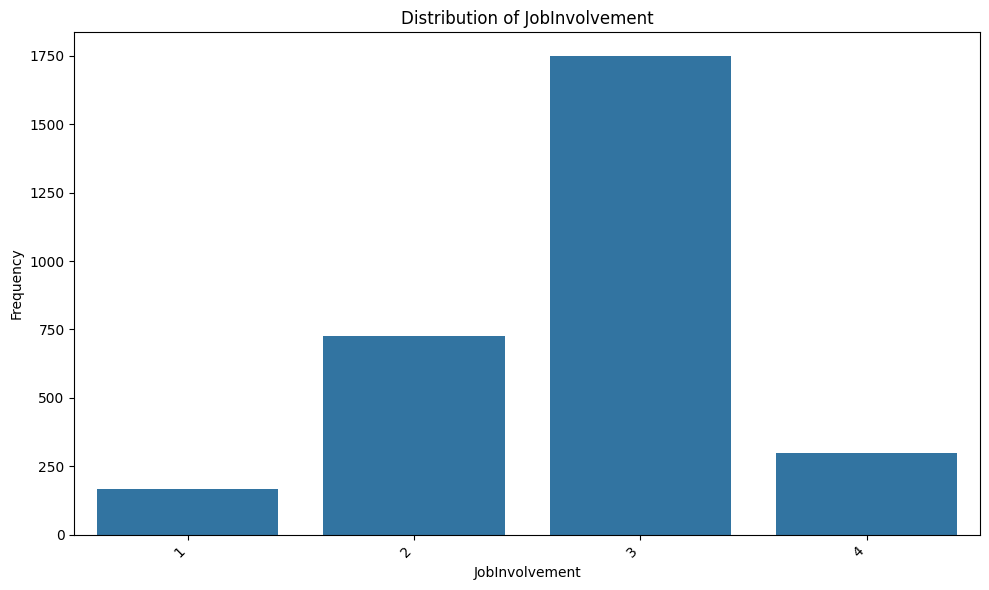

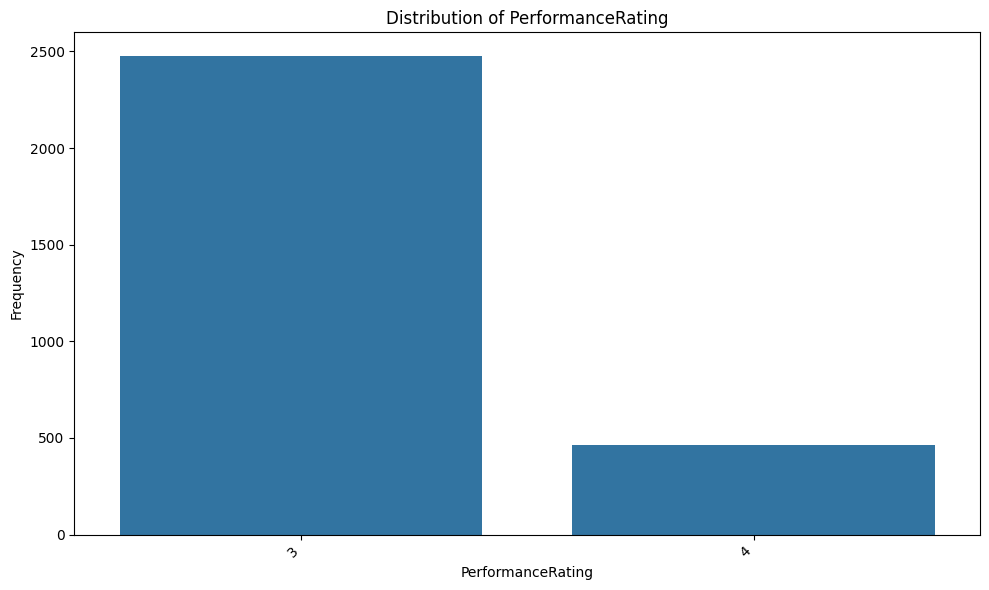

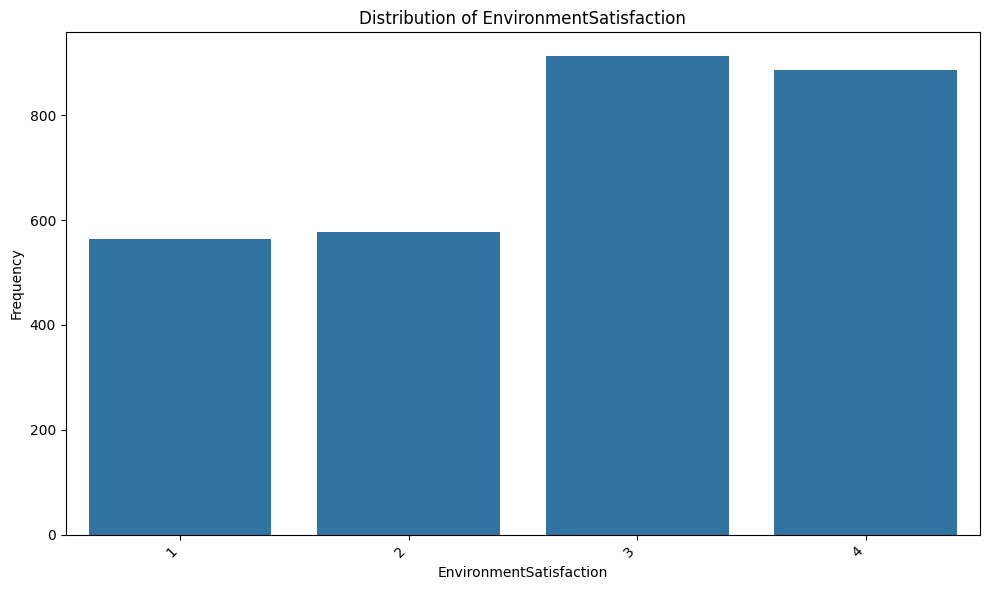

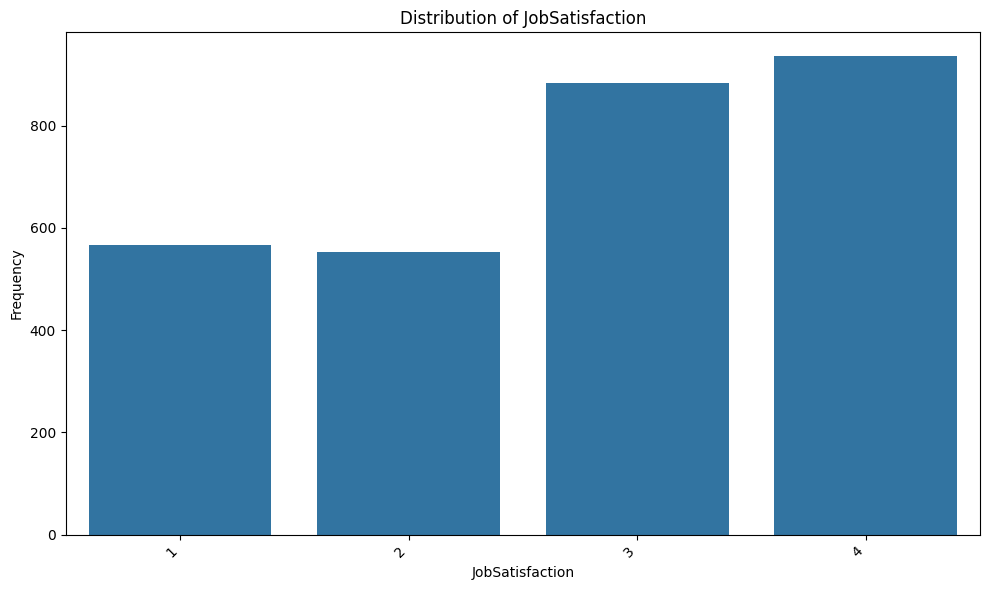

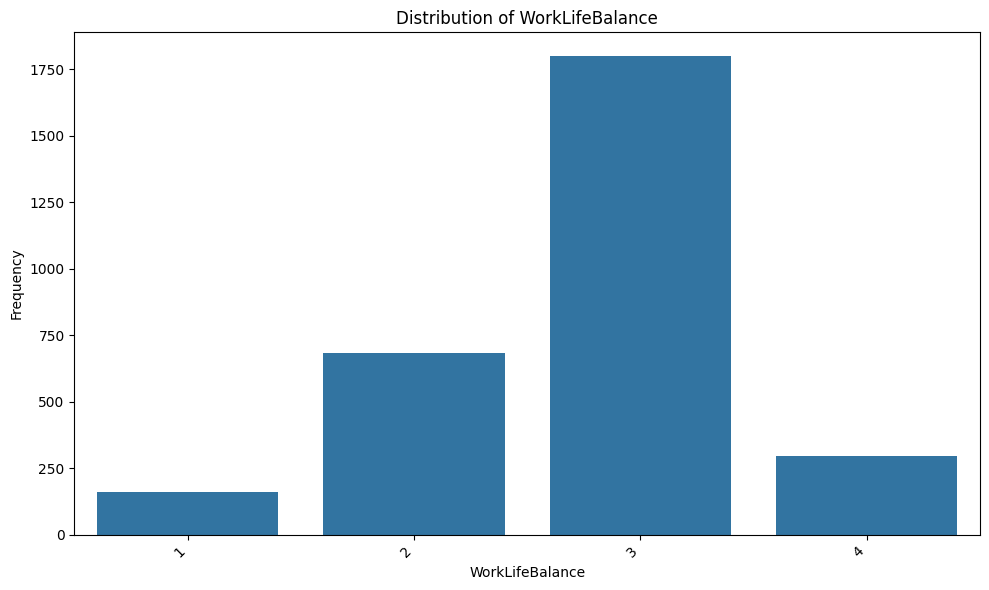

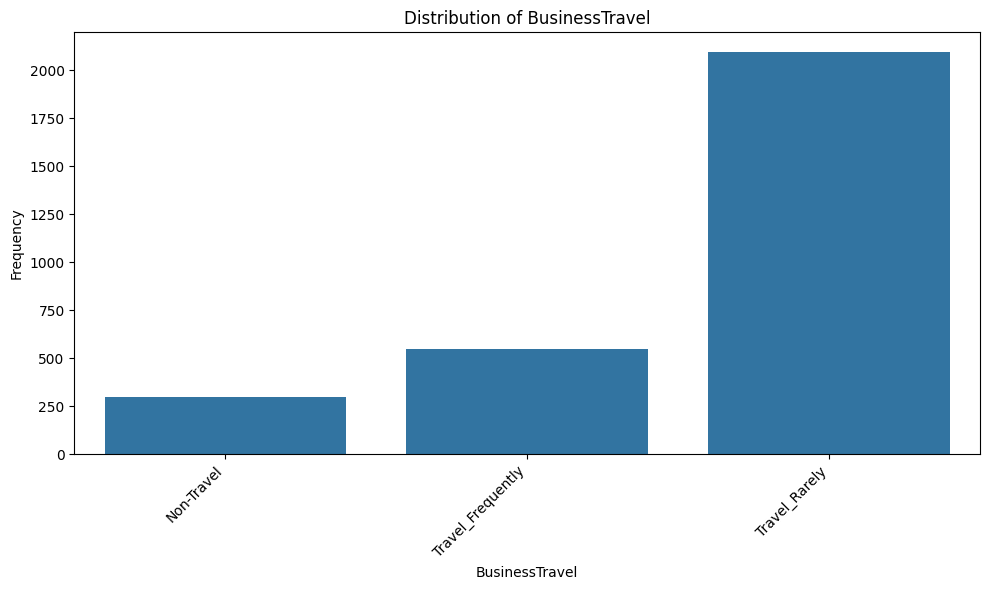

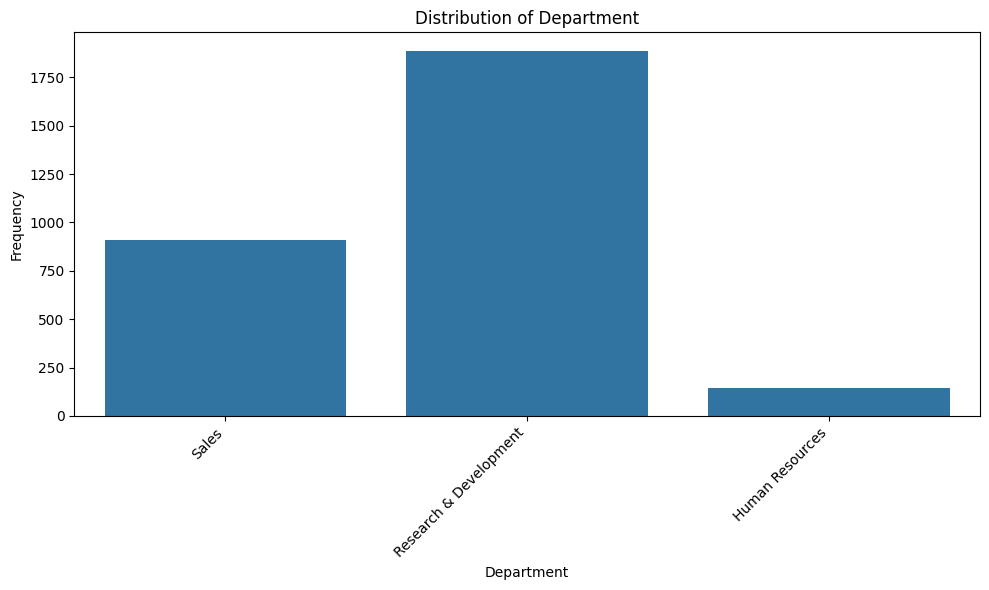

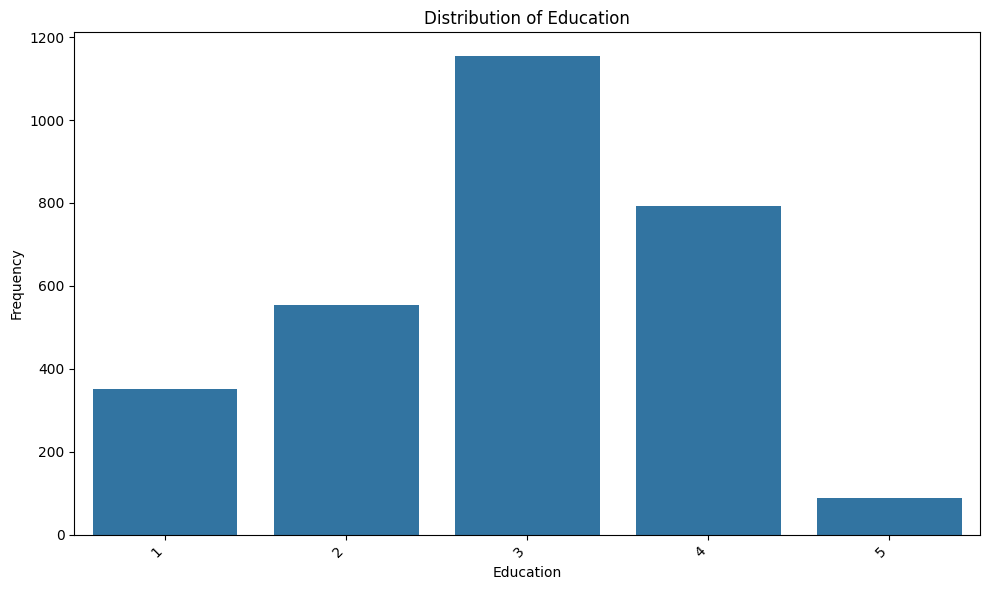

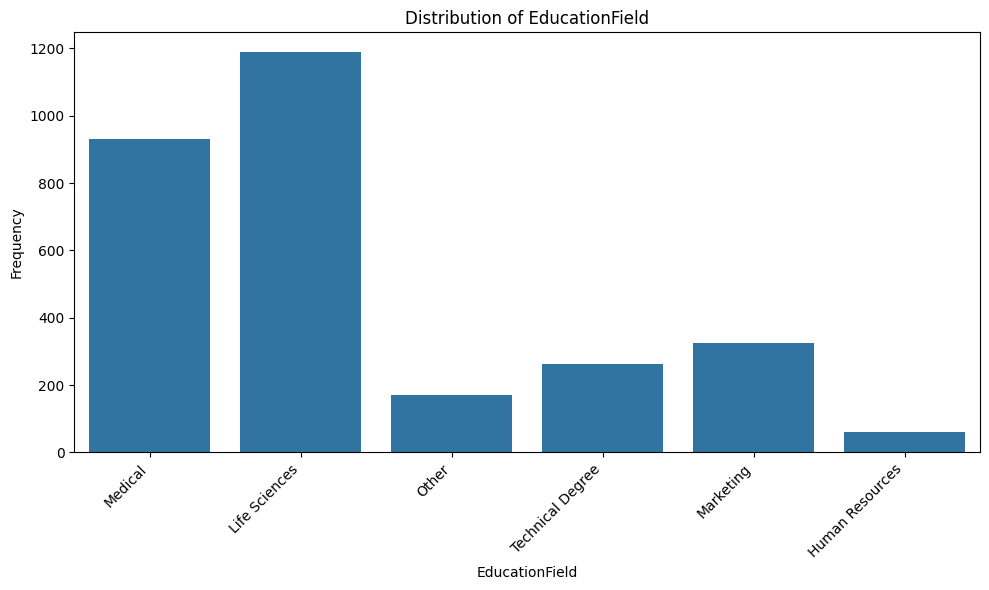

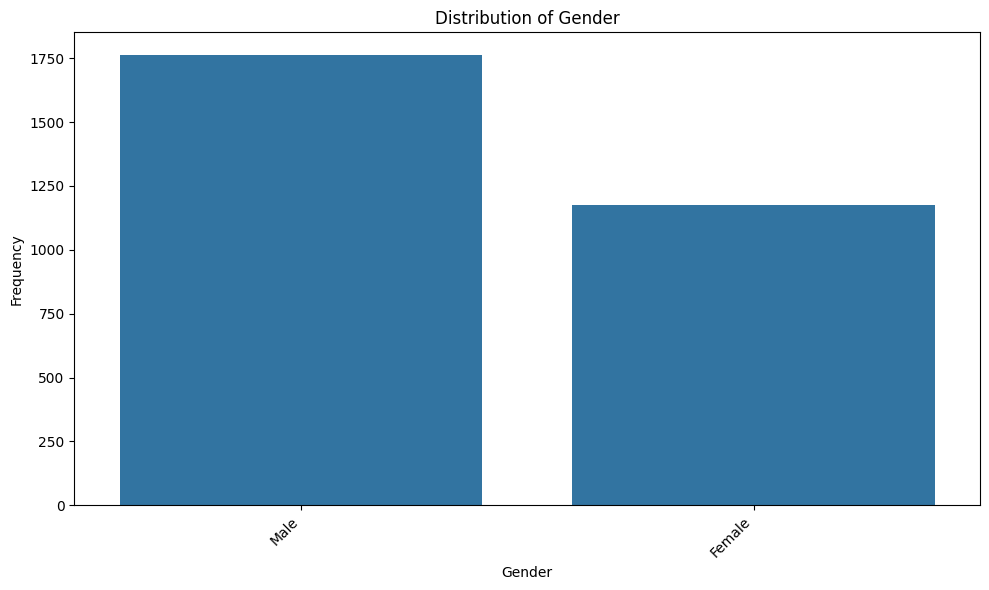

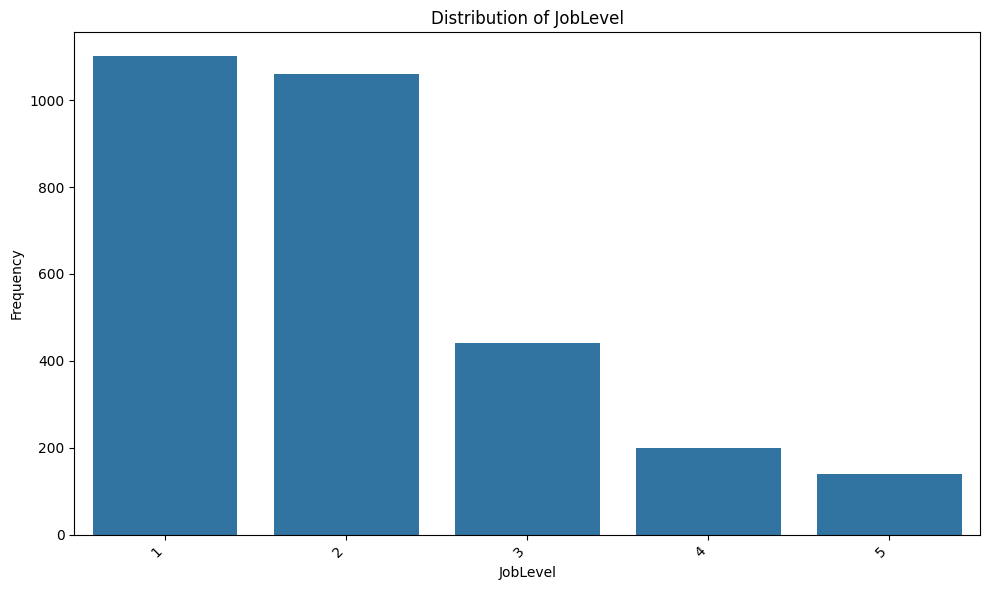

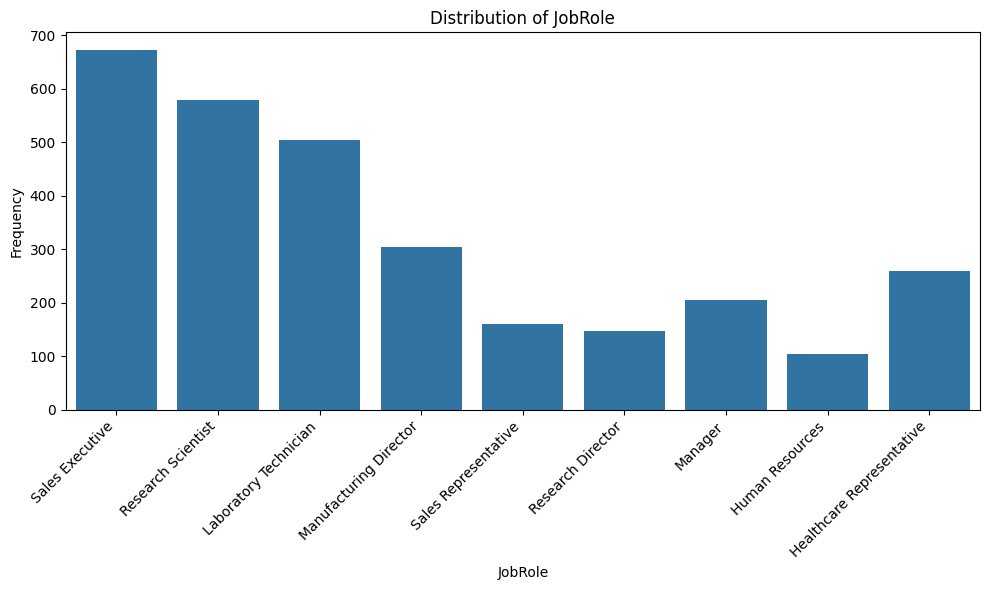

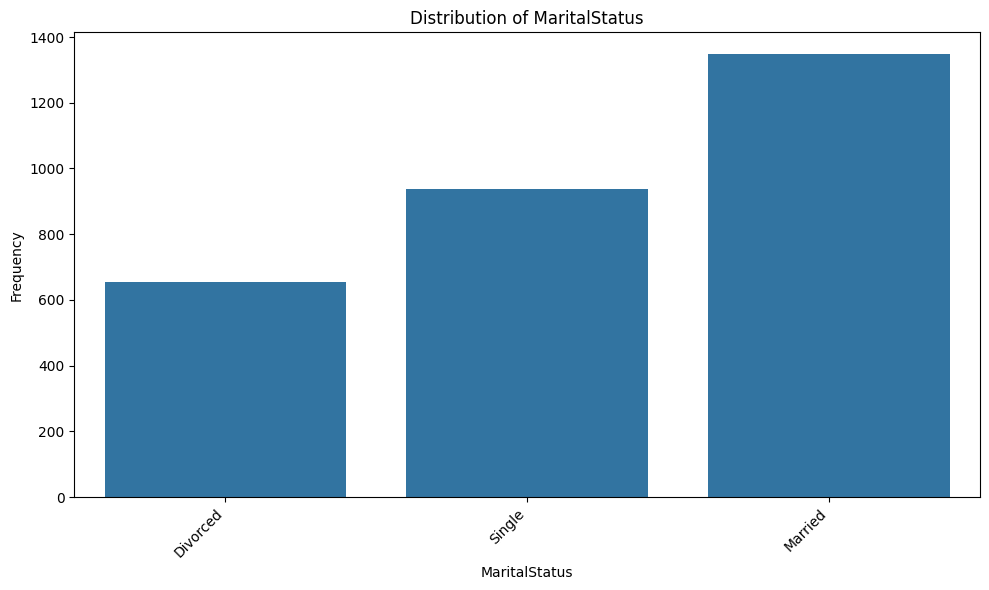

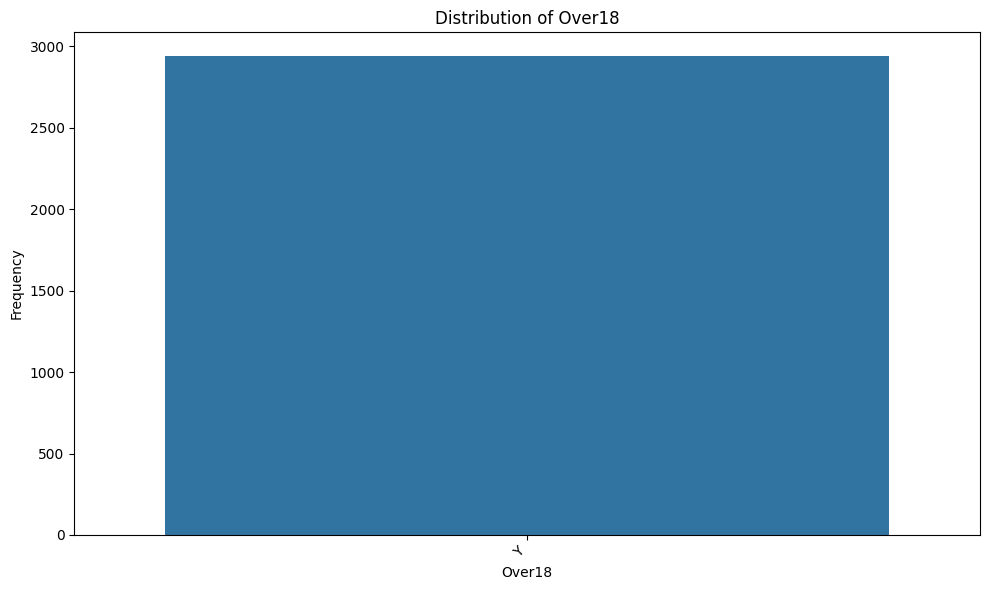

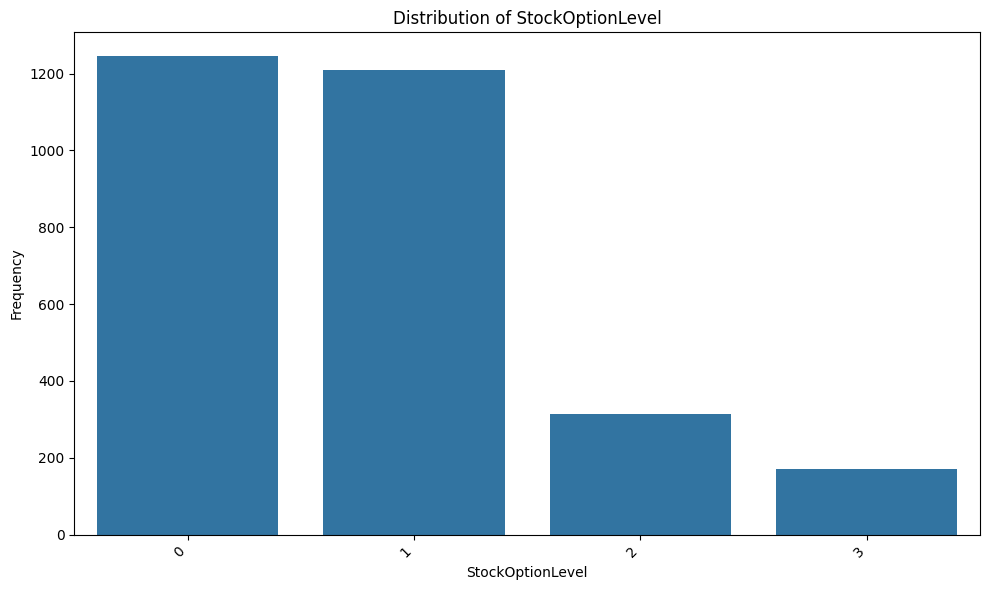

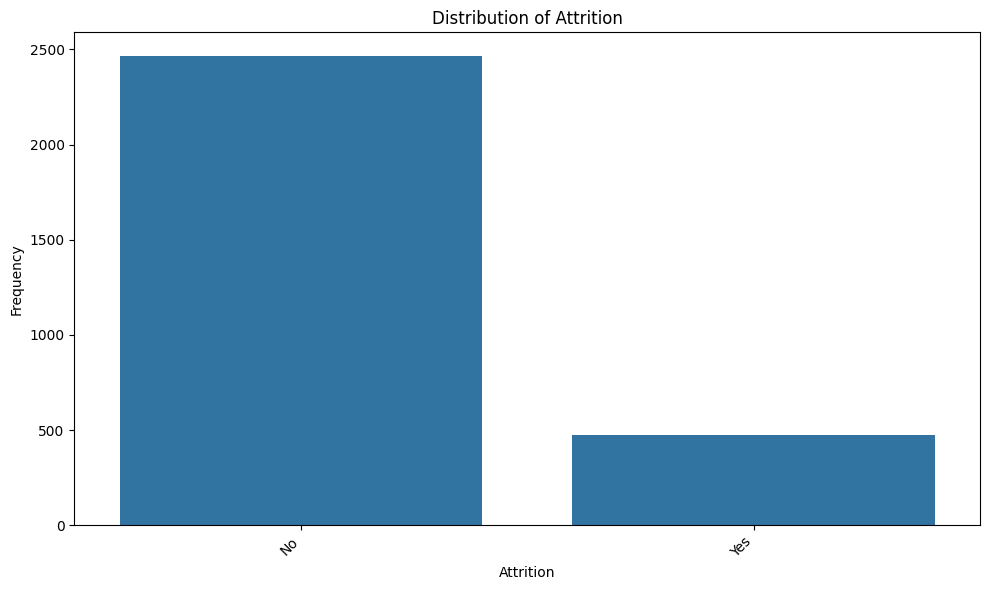

In [ ]:
for col in cat_var:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

From the graphs above, the variable that may cause problems due to a possible high cardinality, *JobRole*, does seem to have some categories with low counts, but given the nature of the categories, there is not a clear way to regroup said categories, and so we decide them to leave them as they are. Furthermore, in other features there are some categories that may cause problems due to their low counts, when possible an option could be to merge the categories into others. One of the examples can be *JobInvolment* where categories 1 and 4 do not present large counts.

#### Constant or ID columns
To be able to see if there are any constant variables in the dataset, it is enough to see how many unique values each variable takes.

The following code shows the variables in the dataset that are constant.

In [ ]:
for variable in df.columns:
    if df[variable].nunique()==1:
        print(variable)

EmployeeCount
Over18
StandardHours


The constant variables in the dataset are *EmployeeCount*, *Over18* (this was easily seen in the corresponding previous plot, for there was only one bar corresponding to the only category of the variable) and *StandardHours*. These variables do not provide any useful information and will only add noise to the analysis. Thus, they will be eliminated.

In [ ]:
df2=df.drop(columns=['EmployeeCount','Over18', 'StandardHours'])

ID column:

In [ ]:
df2['EmployeeID'].nunique() #get the number of unique instances of the variable 'EmployeeID'

2940

On the other hand, the variable *Employee ID* contains 2940 instaces, that is, the variable takes a different value for each individual, which actually makes sense as it is an ID variable. This variable will be used to set the index of the dataset, in case the individuals need to be tracked. Aside from this, the variable will not be taken into account in the analysis.

In [ ]:
#Convert 'EmployeeID' into integer
df2['EmployeeID']=df2['EmployeeID'].astype(int)

#Set the variable as the index for the dataset
df2.set_index('EmployeeID', inplace=True)

Let's see how the new index looks.

In [ ]:
df2.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,
4065,9.183704,15.0,4,3,3,1,4,31.0,Non-Travel,Sales,23.0,1,Medical,Male,1,Sales Executive,Divorced,38670.0,1.0,11.0,1,4.0,4.0,4.0,2.0,3.0,No
4223,6.525485,10.0,2,3,1,3,2,59.0,Travel_Frequently,Research & Development,10.0,4,Life Sciences,Male,3,Research Scientist,Single,23080.0,7.0,19.0,1,20.0,4.0,4.0,1.0,3.0,No
3482,6.435205,14.0,2,3,4,1,3,42.0,Travel_Rarely,Research & Development,11.0,1,Life Sciences,Male,4,Research Scientist,Married,60320.0,0.0,14.0,0,23.0,2.0,22.0,13.0,7.0,No
251,6.335102,12.0,3,3,2,4,3,35.0,Travel_Rarely,Research & Development,10.0,5,Medical,Female,4,Laboratory Technician,Single,134580.0,1.0,11.0,0,17.0,3.0,17.0,11.0,8.0,No
375,7.397718,19.0,2,3,2,4,3,42.0,Travel_Frequently,Sales,13.0,4,Life Sciences,Female,2,Laboratory Technician,Single,22880.0,5.0,16.0,1,8.0,4.0,2.0,2.0,2.0,No


#### Missing values
Now, let's check for missing values for each variable. Any individual with missing values shall be imputed in order to avoid problems with the dataset.

The following two codes can be employed to detect the number of missing values. When applying the function *info* to the dataset we need to check the column *Non-Null Count* which will return the number of non-null instances. If the number is the same as the total number of instances (in this case 2940), then, that variable does not have missing values. The second code is clearer, as it only returns the number of null instances for each variable, by obtaining the sum of the logical vector that indicates whether the instances of each variable are null or not null.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2940 entries, 4065 to 631
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   float64
 2   JobInvolvement           2940 non-null   object 
 3   PerformanceRating        2940 non-null   object 
 4   EnvironmentSatisfaction  2940 non-null   object 
 5   JobSatisfaction          2940 non-null   object 
 6   WorkLifeBalance          2940 non-null   object 
 7   Age                      2940 non-null   float64
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   float64
 11  Education                2940 non-null   object 
 12  EducationField           2940 non-null   object 
 13  Gender                   2940 non-null   object 
 14  JobLevel                 29

In [ ]:
for variable in df2.columns:
    print(f"Number of missing values in {variable} = {df2[variable].isna().sum()}")

Number of missing values in hrs = 0
Number of missing values in absences = 0
Number of missing values in JobInvolvement = 0
Number of missing values in PerformanceRating = 0
Number of missing values in EnvironmentSatisfaction = 0
Number of missing values in JobSatisfaction = 0
Number of missing values in WorkLifeBalance = 0
Number of missing values in Age = 0
Number of missing values in BusinessTravel = 0
Number of missing values in Department = 0
Number of missing values in DistanceFromHome = 0
Number of missing values in Education = 0
Number of missing values in EducationField = 0
Number of missing values in Gender = 0
Number of missing values in JobLevel = 0
Number of missing values in JobRole = 0
Number of missing values in MaritalStatus = 0
Number of missing values in MonthlyIncome = 0
Number of missing values in NumCompaniesWorked = 0
Number of missing values in PercentSalaryHike = 0
Number of missing values in StockOptionLevel = 0
Number of missing values in TotalWorkingYears = 

It can be seen that no variable has missing values, so that no instances need to be imputed.

#### Type of problem
In order to discern whether the problem at hand is a classification or a regression problem, it is necessary to analyze the nature of the response variable *Attrition*: if it is a categorical variable, then the problem is a classification problem; if it is a numerical variable, then the problem is a regression problem.

In [ ]:
df2['Attrition'].describe()

,Attrition
count,2940
unique,2
top,No
freq,2466


In [ ]:
print(f"The type of the variable Attrition is: {df2['Attrition'].dtypes}")
print(f"The different values of the variable Attrition are {df2['Attrition'].unique().tolist()}")
print(f"The proportion of 'No' in the variable Attrition is {df2[df2['Attrition'] == 'No'].shape[0] / df2.shape[0]:.2f}")
print(f"The proportion of 'Yes' in the variable Attrition is {df2[df2['Attrition'] == 'Yes'].shape[0] / df2.shape[0]:.2f}")

The type of the variable Attrition is: object
The different values of the variable Attrition are ['No', 'Yes']
The proportion of 'No' in the variable Attrition is 0.84
The proportion of 'Yes' in the variable Attrition is 0.16


It can be seen that the response variable is a categorical one, with possible values *No* and *Yes*, and thus the situation is a **classification problem**. Moreover, it is an imbalanced problem, for the proportion of No's (84 %) is much greater than the proportion of Yes' (16 %), which indicates that the majority of the individuals under study do not suffer from burnout.

#### Summary of the dataset after computing the EDA

Now, we provide a summary of the dataset, after having performed the EDA.

In [ ]:
print(f"Number of instances = {df2.shape[0]}" )
print(f"Number of features = {df2.shape[1]}")

Number of instances = 2940
Number of features = 27


In [ ]:
num_var=df2.select_dtypes(include=['number']).columns.tolist()
print(f"Number of numerical variables = {len(num_var)} \nName of numerical variables: {num_var}")
cat_var=df2.select_dtypes(include=['object']).columns.tolist()
print(f"Number of categorical variables = {len(cat_var)} \nName of categorical variables: {cat_var}")

Number of numerical variables = 12 
Name of numerical variables: ['hrs', 'absences', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Number of categorical variables = 15 
Name of categorical variables: ['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'StockOptionLevel', 'Attrition']


In [ ]:
df2[num_var].describe()

,hrs,absences,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,7.301712,12.871088,36.986735,9.162245,64990.707483,2.710884,15.179252,11.298639,2.815986,7.003741,2.206122,4.086395
std,1.325524,5.503877,9.111955,8.099534,47216.760535,2.512456,3.694093,7.736160,1.289295,6.123904,3.242448,3.573753
min,5.424757,1.000000,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.277564,8.000000,30.000000,2.000000,29110.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,6.994303,13.000000,35.000000,7.000000,49070.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,7.879901,18.000000,43.000000,14.000000,83535.000000,4.000000,18.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,10.903669,24.000000,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [ ]:
df2[cat_var].describe()

,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,StockOptionLevel,Attrition
count,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940,2940
unique,4,2,4,4,4,3,3,5,6,2,5,9,3,4,2
top,3,3,3,4,3,Travel_Rarely,Research & Development,3,Life Sciences,Male,1,Sales Executive,Married,0,No
freq,1749,2475,913,936,1799,2093,1888,1154,1188,1763,1101,672,1347,1245,2466


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2940 entries, 4065 to 631
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   float64
 2   JobInvolvement           2940 non-null   object 
 3   PerformanceRating        2940 non-null   object 
 4   EnvironmentSatisfaction  2940 non-null   object 
 5   JobSatisfaction          2940 non-null   object 
 6   WorkLifeBalance          2940 non-null   object 
 7   Age                      2940 non-null   float64
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   float64
 11  Education                2940 non-null   object 
 12  EducationField           2940 non-null   object 
 13  Gender                   2940 non-null   object 
 14  JobLevel                 29

Overall, the cleaned dataset contains **2940 instances** with **27 features**: **12 are numerical variables** and **15 are categorical variables**. All of the numerical varaibles are stored as *float64*.

### **2. SETUP**

**Split the data into train and test. Decide on how the inner evaluation is going to be carried out. The inner evaluation is used when doing hyper-parameter optimization/tuning, but it is also used to evaluate and compare different alternatives. This means that if for example, you decide to use 3-fold crossvalidation for the inner evaluation, all alternatives that you try should be evauated with 3-fold crossvalidation, in order to be compared.**

Firstly, let's split the dataset into train and test. In order to perform a good split, the proportion of No's and Yes' will be maintained from the original dataset. The split is done to maintain an 75/25 ratio for the train and test data, respectively.

In [ ]:
# Split the dataset into features (X) and target (y)
X = df2.drop('Attrition', axis=1)  # Features
y = df2['Attrition']               # Target variable

# Perform the train-test split with stratification, so that the proportion of yes' and no's is conserved
# The seed is employed for a reproducible split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed, stratify=y)


As for the inner evaluation, the choice is to perform it through $k$-fold cross validation, in which the train data is splitted into $k$ folds, and, in $k$ instances, one of the folds is used as a test set, and the remaining $k-1$ folds are used as a train set. This is used to choose hyperparameters and to get a preliminary look at which is the best model among several tried. In this project it shall be chosen $k=3$. Again, as the dataset in imbalanced with respect to the target variable *Attrition*, the $k$-fold cross validation was taken to be stratified, as had previously been done for the splitting of the dataset into a train and a test dataset.

In [ ]:
# Use stratified cross validation for the imbalanced dataset
inner=StratifiedKFold(n_splits=3, shuffle=True, random_state=seed) #This is the inner evaluation method that will be used

### **3. BASIC METHODS: TREES AND KNN**
1. **Train, evaluate and compare the two basic methods with default hyperparameters, and also a dummy method. For KNN, you should use a pipeline with preprocessing included (scaling, at least). You should compare 2 scaling methods for KNN and determine which one works better in this problem.**

2. **Do hyperparameter tuning for the two basic methods, using GridSearch and/or Random Search. Does HPO improve results over default hyper-parameter values? At what computational cost? Which HPO technique obtains the best results?**


First of all, it was necessary to identify the types of the different variables, for they needed to be transformed and preprocessed in different ways for us to be able to apply the models to our data. The variables were separated into numerical variables, ordinal categorical variables (those that are codified as integers that correspond to ordered levels, for example, satisfaction) and non ordinal categorical variables (which have no order relathionship for the categories).

In [ ]:
# Separate the variables in types

# Numerical variables
num_var=df2.select_dtypes(include=['number']).columns.tolist()

cat_var=df2.select_dtypes(include=['object']).columns.tolist()
cat_var.remove('Attrition')

# Ordinal categorical variables
ord_var=['JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'PerformanceRating', 'WorkLifeBalance', 'StockOptionLevel', 'JobLevel', 'Education']

# Categorical non-ordinal variables
cat_var=[variable for variable in cat_var if variable not in ord_var]

A function was defined to train and evaluate the models that do not involve hyperparameter tuning. This function returns the mean accuracy obtained by the model through cross-validation, the balanced mean accuracy (which takes into account the imbalance of the dataset), and the training time for the model (as an estimation for its computational cost).

In [ ]:
def evaluate_model_cv(model, X, y): #the arguments are the model, the covariates, and the vector with the response variable
    start_time = time.time() #start the timer
    model.fit(X, y) #fit the chosen model
    end_time = time.time() #stop the timer

    training_time = end_time - start_time #get the training time of the model

    scores = cross_val_score(model, X, y, cv=inner, scoring='accuracy') #get the accuracies obtained by the model in cross validation
    balanced_scores = cross_val_score(model, X, y, cv=inner, scoring='balanced_accuracy') #get the balanced accuracies obtained by the model in cross validation

    mean_accuracy = scores.mean() #get the mean accuracy for the model
    mean_balanced_accuracy = balanced_scores.mean() #get the mean balanced accuracy

    return mean_accuracy, mean_balanced_accuracy, training_time


The following pipeline will be used in most of the fitted models, to apply the necessary preprocessing of the variables to be able to apply the models. For the tree models, the scaling of the numercial variables is not necessary, but it is applied, to be able to better compare the results with the ones obtained through the KNN models, which require said scaling. As for the categorical variables, they need to be preprocessed in all cases. The non ordinal categorical variables are transformed by means of One-Hot encoding, and the ordinal ones are transformed via Ordinal encoding.

One-Hot encoding identifies each category in a categorical variable and assigns it a unique binary vector, whose lengths equal the total number of categories. Only one element in each vector is set to 1, corresponding to the category it represents, while all other elements are 0. Finally, the original categorical feature is replaced by the one-hot encoded vectors in the dataset.

Ordinal encoding converts categorical data into numerical data by assigning a unique integer value to each category. It is specially suited for variables with an intrinsic order, coding the "lowest" category as a 0 and increasing from then on.

In [ ]:
# Define the preprocessing steps for each type of feature, using StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler())
        ]), num_var),

        ('non_ordinal_cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_var),

        ('ordinal_cat', Pipeline([
            ('ordinal', OrdinalEncoder())
        ]), ord_var)
    ])

Once the preprocessing pipeline was created, different models were applied to the dataset to see which gave better results. The criterion for establishing which model was best was to choose the one that gave better results in the inner evaluation (performed thorugh 3-fold cross validation on the train data).

#### Dummy classifier

First of all, a dummy model was created for comparison purposes, rather than to try to learn from the data. Instead, the model was created to help evaluate the performance of more complex models by comparing them to a baseline. We chose the dummy model to be based on the most frequent class, that is, all instances are predicted to belong to the most frequent class in the dataset. For our data, all instances are predicted to be *No's*.



In [ ]:
# Define a dummy classifier
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=seed)

# Evaluate Dummy Classifier
dummy_mean_accuracy, dummy_mean_balanced_accuracy, dummy_time = evaluate_model_cv(dummy_clf, X_train, y_train)
print(f'Dummy Classifier - Mean Accuracy: {dummy_mean_accuracy}, Mean Balanced Accuracy: {dummy_mean_balanced_accuracy}, Training Time: {dummy_time} seconds')


Dummy Classifier - Mean Accuracy: 0.8385487528344672, Mean Balanced Accuracy: 0.5, Training Time: 0.0022368431091308594 seconds


### Tree models

The first models tried were decision trees. Firstly, the model was fitted with the default hyperparameters, and later hyperparameter optimization (HPO) was performed to try to look for a better set of hyperparameters for the problem at hand.

A decision tree is a flowchart-like structure with three main elements: nodes (represent a split based on a feature), branches (represent the outcomes of the split made in the node they come from) and leaves (represent the final decision or classification thorugh that path of the tree). The tree starts with a root node and splits the data recursively based on feature conditions until it reaches a stopping criterion, such as a maximum depth or a minimum number of samples. At each node, the model selects the best feature and threshold to split the data based on a criterion, like gini impurity (measures how heterogenous the classes created by the node is, we try to get classes as homogeneous as possible) or entropy (measures the information gained by a split). The data is split into subsets at each node until either all samples in a node belong to the same class, a predefined maximum tree depth is reached, or the minimum number of samples in a node is too small to continue splitting. Once the tree is built, a new data point is classified by traversing the tree based on the feature values and reaching a leaf node, which contains the predicted class.

The hyperparameters studied in the case of hyperparameter tuning were *max_depth* (establishes the maximum depth of the tree, default is set to *None*, the nodes are expanded until all leaves are pure or until they contain fewer than *min_samples_split* samples), *min_samples_split* (establishes the minimum number of samples required to split an internal node, default is set to 2), *min_samples_leaf* (establishes the minimum number of samples required to be at a leaf node, default is set to 1) and *criterion* (establishes how the split at each node is determined, default is set to gini).

The HPO was performed for the tree model through RandomizedSeachCV which, upon providing a range or distribution of the parameters to tune, randomly samples a fixed number of parameter combinations from the specified grid. For each sampled combination of hyperparameters, it performs cross-validation on the training data to evaluate the model's performance, and chooses the combination of hyperparameters that yields the best performance based on the chosen scoring metric. This process is repeated many times to get more reliable results, and it proves to be less computationally expensive than GridSearchCV, which tries all combinations of parameters from the values given in a grid.



#### Tree classifier with default hyperparameters

In [ ]:
# Create the pipeline to fit the tree using default hyperparameters
tree_default = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=seed)) # set a seed for reproducibility
])

# Evaluate the model
tree_default_mean_accuracy, tree_default_mean_balanced_accuracy, tree_default_time = evaluate_model_cv(tree_default, X_train, y_train)
print(f'Default Tree - Mean Accuracy: {tree_default_mean_accuracy}, Mean Balanced Accuracy: {tree_default_mean_balanced_accuracy}, Training Time: {tree_default_time} seconds')


Default Tree - Mean Accuracy: 0.8843537414965986, Mean Balanced Accuracy: 0.7858867325315023, Training Time: 0.062392234802246094 seconds


#### Hyperparameter tuning for decision trees using random search

In [ ]:
# Define the parameter grid for Random Search
param_dist_tree = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Create the RandomizedSearchCV object
random_search_tree = RandomizedSearchCV(tree_default, param_distributions=param_dist_tree, n_iter=50, cv=inner, scoring='accuracy', random_state=seed, n_jobs=-1)

# Fit the model and obtain the fitting time
start_time = time.time()
random_search_tree.fit(X_train, y_train)
end_time = time.time()

random_search_tree_time = end_time - start_time

# Get the best parameters and best score
best_params_tree = random_search_tree.best_params_
best_score_tree = random_search_tree.best_score_

print(f'Best parameters for Decision Tree: {best_params_tree}')
print(f'Best cross-validation accuracy for Decision Tree: {best_score_tree}')
print(f'Training Time for Random Search on Decision Tree: {random_search_tree_time} seconds')

# Repeat the process using balanced accuracy
random_search_tree_ba = RandomizedSearchCV(tree_default, param_distributions=param_dist_tree, n_iter=50, cv=inner, scoring='balanced_accuracy', random_state=seed, n_jobs=-1)

start_time = time.time()
random_search_tree_ba.fit(X_train, y_train)
end_time = time.time()

random_search_tree_ba_time = end_time - start_time

best_params_tree_ba = random_search_tree_ba.best_params_
best_score_tree_ba = random_search_tree_ba.best_score_

print(f'Best parameters for Decision Tree (balanced accuracy): {best_params_tree_ba}')
print(f'Best cross-validation accuracy for Decision Tree (balanced accuracy): {best_score_tree_ba}')
print(f'Training Time for Random Search on Decision Tree (balanced accuracy): {random_search_tree_ba_time} seconds')


Best parameters for Decision Tree: {'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__criterion': 'entropy'}
Best cross-validation accuracy for Decision Tree: 0.8870748299319727
Training Time for Random Search on Decision Tree: 14.511149168014526 seconds
Best parameters for Decision Tree (balanced accuracy): {'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': None, 'classifier__criterion': 'entropy'}
Best cross-validation accuracy for Decision Tree (balanced accuracy): 0.7931354810868215
Training Time for Random Search on Decision Tree (balanced accuracy): 15.798271179199219 seconds


The hyperparameters found to be the best ones through the HPO are all the default ones, but the *criterion* hyperparameter, which is changed to be **entropy**.

### KNN models

Now, let's apply the KNN method to the data, both with the default hyperparameters and with hyperparameter tuning for the hyperparameters *Number of neighbours* and *Weights*. In the case for the default hyperparamters, the *Standard Scaler* and the *MinMax Scaler* will be applied to see which one gives better results, and then this scaler will be applied to the model with optimized parameters.

KNN is  a non-parametric, instance-based learning algorithm, so it does not make assumptions about the data distribution and directly uses the training data for making predictions. For a given test point, the algorithm identifies the $k$ training samples closest to the test point (its $k$-nearest neighbors), and then it predicts the class label by majority voting among these neighbors. The two main parameters are *Number of neighbours* (establishes how many neighbors are considered for each point, by default is set to 5) and *Weights* (establishes how important are the neighbors considered, by deault is set to uniform. There are two options: *uniform* establishes that all have the same importance, that is, equal weights, and *distance*, which establishes greater weights to the closer neighbors, set to be more important in the decision).




#### KNN with default hyper-parameters

In [ ]:
# Define the preprocessing steps for MinMaxScaler (the one for standard scaler is already made for the previous models)
preprocessor_minmax = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', MinMaxScaler())
        ]), num_var),

        ('non_ordinal_cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_var),

        ('ordinal_cat', Pipeline([
            ('ordinal', OrdinalEncoder())
        ]), ord_var)
    ])

# Define the pipelines with the KNN classifier

#Model with StandardScaler
knn_def= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

#Model with MinMaxScaler
knn_def_minmax = Pipeline(steps=[
    ('preprocessor', preprocessor_minmax),
    ('classifier', KNeighborsClassifier())
])

# Evaluate KNN with StandardScaler
knn_standard_mean_accuracy, knn_standard_mean_balanced_accuracy, knn_standard_time = evaluate_model_cv(knn_def, X_train, y_train)
print(f'KNN with StandardScaler - Mean Accuracy: {knn_standard_mean_accuracy}, Mean Balanced Accuracy: {knn_standard_mean_balanced_accuracy}, Training Time: {knn_standard_time} seconds')

# Evaluate KNN with MinMaxScaler
knn_minmax_mean_accuracy, knn_minmax_mean_balanced_accuracy, knn_minmax_time = evaluate_model_cv(knn_def_minmax, X_train, y_train)
print(f'KNN with MinMaxScaler - Mean Accuracy: {knn_minmax_mean_accuracy}, Mean Balanced Accuracy: {knn_minmax_mean_balanced_accuracy}, Training Time: {knn_minmax_time} seconds')


KNN with StandardScaler - Mean Accuracy: 0.8575963718820862, Mean Balanced Accuracy: 0.5986868619481317, Training Time: 0.05576181411743164 seconds
KNN with MinMaxScaler - Mean Accuracy: 0.8281179138321996, Mean Balanced Accuracy: 0.5505147212631122, Training Time: 0.04391741752624512 seconds


It can be seen, for the results above, that Standard Scaler gives better results in our case, as the mean balanced accuracy and the mean accuracy are higher than when the MinMax Scaler is employed. This way, this is the scaler that will be used for the model obtained through HPO.

#### Hyperparameter Tuning for KNN using Grid Search


Now, for the HPO for KNN models, GridSearchCV was employed, as the number of parameters to consider is smaller than for the tree models, and thus the number of combinations is way smaller, so we can try all alternatives without a great computational cost.

In [ ]:
# Define the hyperparameter grid
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11],
    'classifier__weights': ['uniform', 'distance']
}
# Use GridSearchCV for hyperparameter tuning with StandardScaler
grid_search_knn = GridSearchCV(knn_def, param_grid=param_grid_knn, cv=inner, scoring='accuracy', n_jobs=-1)

# Fit the model and measure the time
start_time = time.time()
grid_search_knn.fit(X_train, y_train)
end_time = time.time()

grid_search_knn_time = end_time - start_time

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f'Best parameters for KNN: {best_params_knn}')
print(f'Best cross-validation accuracy for KNN: {best_score_knn}')
print(f'Training Time for Grid Search on KNN: {grid_search_knn_time} seconds')

# Repeat the process using balanced accuracy
grid_search_knn_ba = GridSearchCV(knn_def, param_grid=param_grid_knn, cv=inner, scoring='balanced_accuracy', n_jobs=-1)

start_time = time.time()
grid_search_knn_ba.fit(X_train, y_train)
end_time = time.time()

grid_search_knn_ba_time = end_time - start_time

best_params_knn_ba = grid_search_knn_ba.best_params_
best_score_knn_ba = grid_search_knn_ba.best_score_

print(f'Best parameters for KNN balanced accuracy: {best_params_knn_ba}')
print(f'Best cross-validation accuracy for KNN balanced accuracy: {best_score_knn_ba}')
print(f'Training Time for Grid Search on KNN balanced accuracy: {grid_search_knn_ba_time} seconds')


Best parameters for KNN: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance'}
Best cross-validation accuracy for KNN: 0.9111111111111111
Training Time for Grid Search on KNN: 1.4999868869781494 seconds
Best parameters for KNN balanced accuracy: {'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Best cross-validation accuracy for KNN balanced accuracy: 0.7723744403825717
Training Time for Grid Search on KNN balanced accuracy: 2.4904375076293945 seconds


In this case, it was found that, choosing accuracy or balanced accuracy as the criterion to choose the best parameters, the model is slightly different. For the case when *accuracy* is the criterion, the number of neighbors is 5, as for the default case, but when *balanced accuracy* is chosen, the numebr of neighbors is lower, set to 3. This may be because of the imbalancing of the dataset, and if the number of neighbors is too high, then, when it is time to classify instances from the minority class, it is more likely that instances from the majority class slip into their nighborhoods, affefcting the predictions, and thus decreasing the accuracy in the minority class. In both cases, the hyperparameter *weights* is changed to *distance* with respect to the default case.

### **4. RESULTS AND FINAL MODEL**

*   **Report your results: report the inner evaluation of all alternatives tested and select the best one according to the inner evaluation.**



The following table shows, for each one of the models applied, the mean accuracy and the mean balanced accuracy obtained in the cross validation process, as well as the training time in seconds for each of the models.

In [ ]:
results = pd.DataFrame({
    'Model': ['Dummy Classifier','Default Tree', 'Random Search Tree', 'KNN StandardScaler', 'KNN MinMaxScaler', 'Grid Search KNN'],
    'Mean Accuracy': [dummy_mean_accuracy, tree_default_mean_accuracy, best_score_tree, knn_standard_mean_accuracy, knn_minmax_mean_accuracy, best_score_knn],
    'Mean Balanced Accuracy': [dummy_mean_balanced_accuracy, tree_default_mean_balanced_accuracy, best_score_tree_ba, knn_standard_mean_balanced_accuracy, knn_minmax_mean_balanced_accuracy, best_score_knn_ba],
    'Training Time (seconds)': [dummy_time, tree_default_time, random_search_tree_ba_time, knn_standard_time, knn_minmax_time, grid_search_knn_ba_time]
})

results

,Model,Mean Accuracy,Mean Balanced Accuracy,Training Time (seconds)
0,Dummy Classifier,0.838549,0.500000,0.002237
1,Default Tree,0.884354,0.785887,0.062392
2,Random Search Tree,0.887075,0.793135,15.798271
3,KNN StandardScaler,0.857596,0.598687,0.055762
4,KNN MinMaxScaler,0.828118,0.550515,0.043917
5,Grid Search KNN,0.911111,0.772374,2.490438


Firstly, it is notable to say that the accuracies are in all cases higher than the balanced accuracies. This is due to the imbalance of the dataset. As there is a much higher proportion of No's than of Yes', the training of the model will be biased towards favoring an accurate prediction of the dominant class (maximizing the quality of the predictions for the majority of the instances). Precisely because of this big imbalance in the dataset, the mean balanced accuracy will be the measure employed to choose between models, in order to better exemplify the goodness of the prediction for both classes (as the proportion of Yes' and No's in our dataset may not be the real distribution of the population under study).

The interpretation of the mean accuracy and the mean balanced accuracy can easily be seen thrpugh the analysis of these values for the dummy model. The accuracy is of 83.85 %, whereas the balanced accuracy is of only 50 %. This makes sense, as the model predicts every instance as belonging to the most dominant class, in our case No. This way, the accuracy, that is, the proportion of correctly classified instances, corresponds to the proportion of No's in the train set (chosen to be the same as for the original dataset due to stratified split performed), as all No's are correctly classified and all Yes' are incorrectly classified. Because of this, the balanced accuracy is of 50 %, as the accuracy in the No class is of 100 % and the accuracy in the Yes class is of 0 %.

Finally, it can be seen that the best model (the one with the highest mean balanced accuracy) is the tree model obtained through HPO via random search, with a balanced accuracy of 79.31 %. However, the default tree model has a pretty close balanced accuracy, of 78.59 %, with a difference of barely 0.7 % between both models. However, the difference in training time is considerable, with the training time for the HPO model being of the order of 100 times that of the default model. Due to the great difference in training time and the small increase of accuracy in return, we have decided that the best model is the **Default Tree Model**.

In the case of the KNN models, we find that hyperparameter tuning provides a much better result than the default model, with respective balanced accuracies of 77.24 % and 59.87 % (we compare the HPO model with the default model with standard scaler, as it was shown to be the best scaler). However, this improvement also comes at a computation cost, with the training time for the HPO model being of the order of 10 times that of the default model. In this case, given the great increase in accuracy, we would choose to get the model with optimized parameters as the best KNN model (remember that the best model is still a tree model).

As for the difference between both methods of optimizing the parameters for the models, GridSearchCV gives intrinsically better results, as all possible combinations are tried and no one is ever left out, so that the combination chosen is the best chosen out of all of the possible ones tried. As for RandomizedSearchCV, it is possible, due to the random nature of the process, that some combinations are not tried and thus the whole parameter space is not covered. However, this can be mitigated by increasing the number of iterations of the method, so that it is less likely that a combination is left unchecked. RandomizedSearchCV is in return much more computationally efficient, as the training time is way smaller, and the performance of the model, although it will always be lower or equal to the one obtained by GridSearchCV by definition, will most of the times be compensated by the great save in computation time, and thus RandomizedSearchCV is generally the best option for performing hyperparameter tuning via cross validation.

*   **Evaluate the best alternative on the test set in order to estimate what the performance of your model could be at the competition (outer evaluation == estimation of future performance).**

Once the **Default Tree Model** was chosen as the best model by the inner evaluation, we evaluated the model on the test data obtained through our original split of the available data, in order to estimate the future performance of the model.

In [ ]:
# Fit the pipeline on the training data
tree_default.fit(X_train, y_train)

# Predict on the test set
y_pred_tree=tree_default.predict(X_test)

# Calculate accuracy and balanced accuracy on the test set
test_accuracy_tree=accuracy_score(y_test,y_pred_tree)
test_balanced_accuracy_tree=balanced_accuracy_score(y_test,y_pred_tree)

# Calculate confusion matrix on the test set
conf_matrix_tree=confusion_matrix(y_test,y_pred_tree)

print(f'Test Accuracy: {test_accuracy_tree}')
print(f'Test Balanced Accuracy: {test_balanced_accuracy_tree}')
print(f'Confusion Matrix:\n{conf_matrix_tree}')

Test Accuracy: 0.9333333333333333
Test Balanced Accuracy: 0.8848995961871274
Confusion Matrix:
[[590  27]
 [ 22  96]]


The default tree model showed a test balanced accuracy of 88.49 % and a test accuracy of 93.33 %, so that we expect that around 93.33 % of the instances will be correctly predicted when presented with a new dataset.

In the test data, interpreting the confusion matrix, we find that 590 No's were correctly classified as No's, but that 27 No's were predicted as Yes'. On the other hand, 96 Yes' were correctly classified as Yes', whereas 22 Yes' were predicted as No's.

*  **Using the best method, train the final model and use it to make predictions on the competition dataset. Save both the final model in an appropriate ML format and the competition predictions in a a csv file.**

First, we need to read and preprocess the data as what we did with the available data.

In [ ]:
#We read the competition dataset
rutadfcomp="/content/drive/MyDrive/Colab Notebooks/attrition_competition_13.csv.gz"
df_comp=pd.read_csv(rutadfcomp)

In [ ]:
false_num=['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
           'Education', 'JobLevel', 'StockOptionLevel']

for variable in false_num:
    df_comp[variable]=df_comp[variable].astype(int).astype('object')

In [ ]:
df_comp=df_comp.drop(columns=['EmployeeCount','Over18', 'StandardHours'])

In [ ]:
# convert 'EmployeeID' into integer
df_comp['EmployeeID']=df_comp['EmployeeID'].astype(int)
df_comp.set_index('EmployeeID', inplace=True)

In [ ]:
df_comp.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,
3111,7.502945,9.0,2,3,1,4,3,47.0,Travel_Rarely,Research & Development,1.0,3,Technical Degree,Male,5,Manufacturing Director,Divorced,135700.0,5.0,16.0,2,20.0,2.0,5.0,0.0,4.0
146,6.411313,8.0,2,3,2,1,3,41.0,Travel_Rarely,Research & Development,7.0,3,Technical Degree,Female,3,Research Scientist,Married,27820.0,1.0,14.0,0,10.0,2.0,10.0,0.0,7.0
948,7.285614,8.0,3,3,4,2,3,32.0,Travel_Rarely,Sales,1.0,3,Life Sciences,Male,2,Research Scientist,Single,27430.0,1.0,19.0,1,1.0,2.0,1.0,0.0,0.0
481,6.757529,12.0,4,3,4,4,3,39.0,Travel_Rarely,Sales,2.0,3,Life Sciences,Male,3,Human Resources,Married,21150.0,1.0,18.0,0,21.0,3.0,21.0,11.0,8.0
1553,5.784857,9.0,3,3,4,4,2,37.0,Travel_Rarely,Sales,1.0,4,Life Sciences,Male,2,Healthcare Representative,Divorced,133480.0,7.0,14.0,0,8.0,4.0,6.0,0.0,4.0


In [ ]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 3111 to 1442
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      1470 non-null   float64
 1   absences                 1470 non-null   float64
 2   JobInvolvement           1470 non-null   object 
 3   PerformanceRating        1470 non-null   object 
 4   EnvironmentSatisfaction  1470 non-null   object 
 5   JobSatisfaction          1470 non-null   object 
 6   WorkLifeBalance          1470 non-null   object 
 7   Age                      1470 non-null   float64
 8   BusinessTravel           1470 non-null   object 
 9   Department               1470 non-null   object 
 10  DistanceFromHome         1470 non-null   float64
 11  Education                1470 non-null   object 
 12  EducationField           1470 non-null   object 
 13  Gender                   1470 non-null   object 
 14  JobLevel                 1

In [ ]:
print(f"Numeric variables: {num_var},\nCategorical non-ordinal variables: {cat_var},\nCategorical ordinal variables: {ord_var}")

Numeric variables: ['hrs', 'absences', 'Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
Categorical non-ordinal variables: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'],
Categorical ordinal variables: ['JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'PerformanceRating', 'WorkLifeBalance', 'StockOptionLevel', 'JobLevel', 'Education']


Now, when the data is ready, we train our chosen model on the whole data that we had available in the beginning (before the splitting into train and test), and we use it to predict the variable *Attrition* from the data in the competition dataset. The model shall be saved on joblib format, and the predictions will be stored in a csv file.

In [ ]:
# Train the final model on the entire dataset
tree_default.fit(X, y)

# Make predictions on the competition dataset
competition_predictions = tree_default.predict(df_comp)

# Save the final model
joblib.dump(tree_default, '/content/drive/MyDrive/Colab Notebooks/final_model.joblib')

# Save the competition predictions in a csv file
competition_predictions_df = pd.DataFrame(competition_predictions, columns=['Attrition'])
competition_predictions_df.to_csv('/content/drive/MyDrive/Colab Notebooks/competition_predictions.csv', index=False)

print("Final model and competition predictions have been saved.")

Final model and competition predictions have been saved.


### **5. OPEN-CHOICE TASK**
**Decide on your own some additional task, either because it could improve results or because you find it particularly interesting to explore. Justify your selection.**

In order to expand upon this project, we decided to try two other models to see if the we obtained better results. The models chosen were Gradient Boosting Machine (GBM) and Random Forest. The results of both models were obtained, to see if these models offered a better predictive power than the default tree model.

Firstly, GBM was trained for our problem. It builds models sequentially, where each new model corrects the errors of the previous ones, improving overall performance. Boosting is a technique that combines multiple weak learners (models that perform slightly better than random guessing) to create a strong learner. In GBM, weak learners are decision trees built sequentially, and the model is optimized by minimizing a loss function using gradient descent. Each tree focuses on the residual errors (the difference between actual and predicted values) of the previous trees, and the new tree's predictions are added to the current model to reduce these residuals.



In [ ]:
# Create Gradient Boosting Classifier pipeline
gbc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=seed))
])

# Fit and evaluate the model
gbc_mean_accuracy, gbc_mean_balanced_accuracy, gbc_time = evaluate_model_cv(gbc, X_train, y_train)
print(f'Gradient Boosting Classifier - Mean Accuracy: {gbc_mean_accuracy}, Mean Balanced Accuracy: {gbc_mean_balanced_accuracy}, Training Time: {gbc_time} seconds')

# Predict on the test set
y_pred_gbc = gbc.predict(X_test)

# Calculate accuracy and balanced accuracy on the test set
test_accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
test_balanced_accuracy_gbc = balanced_accuracy_score(y_test, y_pred_gbc)

# Calculate confusion matrix on the test set
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

print(f'Test Accuracy: {test_accuracy_gbc}')
print(f'Test Balanced Accuracy: {test_balanced_accuracy_gbc}')
print(f'Confusion Matrix:\n{conf_matrix_gbc}')


Gradient Boosting Classifier - Mean Accuracy: 0.892063492063492, Mean Balanced Accuracy: 0.6929838881833384, Training Time: 0.8606541156768799 seconds
Test Accuracy: 0.8802721088435375
Test Balanced Accuracy: 0.7025107820784001
Confusion Matrix:
[[595  22]
 [ 66  52]]


Random Forest was also tried on our data. It builds multiple decision trees and combines their outputs to improve accuracy and robustness. Random Forest introduces randomness in two ways: through data sampling (bagging) and feature selection, making it less prone to overfitting and better at handling complex datasets. The model consists of many individual decision trees (weak learners), each one of them trained on a random subset of the data (bagging). At each split, only a random subset of features is considered for splitting, which introduces diversity among the trees and reduces overfitting. For classification, each tree votes on the predicted class, and the class with the most votes is the final output.

In [ ]:
# Create the Random Forest Classifier pipeline
rfc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=seed))
])

# Fit and evaluate the model
rfc_mean_accuracy, rfc_mean_balanced_accuracy, rfc_time = evaluate_model_cv(rfc, X_train, y_train)
print(f'Random Forest Classifier - Mean Accuracy: {rfc_mean_accuracy}, Mean Balanced Accuracy: {rfc_mean_balanced_accuracy}, Training Time: {rfc_time} seconds')

# Predict on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy and balanced accuracy on the test set
test_accuracy_rfc = accuracy_score(y_test, y_pred)
test_balanced_accuracy_rfc = balanced_accuracy_score(y_test, y_pred)

# Calculate confusion matrix on the test set
conf_matrix_rfc = confusion_matrix(y_test, y_pred)

print(f'Test Accuracy: {test_accuracy_rfc}')
print(f'Test Balanced Accuracy: {test_balanced_accuracy_rfc}')
print(f'Confusion Matrix:\n{conf_matrix_rfc}')

Random Forest Classifier - Mean Accuracy: 0.926077097505669, Mean Balanced Accuracy: 0.7756119157699466, Training Time: 0.47847723960876465 seconds
Test Accuracy: 0.9523809523809523
Test Balanced Accuracy: 0.8585487459824739
Confusion Matrix:
[[615   2]
 [ 33  85]]


In [ ]:
# Comparison of inner evaluation
inner_ev = pd.DataFrame({
    'Model': ['Default Tree', 'Gradient Boosting Machine', 'Random Forest'],
    'Mean Accuracy': [tree_default_mean_accuracy, gbc_mean_accuracy, rfc_mean_accuracy],
    'Mean Balanced Accuracy': [tree_default_mean_balanced_accuracy, gbc_mean_balanced_accuracy, rfc_mean_balanced_accuracy],
    'Training Time (seconds)': [tree_default_time, gbc_time, rfc_time]
})

inner_ev

,Model,Mean Accuracy,Mean Balanced Accuracy,Training Time (seconds)
0,Default Tree,0.884354,0.785887,0.062392
1,Gradient Boosting Machine,0.892063,0.692984,0.860654
2,Random Forest,0.926077,0.775612,0.478477


The previous table shows the comparison of the inner evaluation for all three models. As it can be seen, the Random Forest gives a better mean accuracy than the deafult tree (92.61 % vs 88.44 %), but a worse mean balanced accuracy (78.59 % vs 77.56 %), even those the latter ones differ by just 1 %. As the conslusions for the inner evaluation of these two models are pretty similar, it will also be appropiate to look at their expected predictive power to decide which one may be the best. On the other hand, GBM provides the worst results across the board.

In [ ]:
# Comparison of outer evaluation
outer_ev = pd.DataFrame({
    'Model': ['Default Tree', 'Gradient Boosting Machine', 'Random Forest'],
    'Test Accuracy': [test_accuracy_tree, test_accuracy_gbc, test_accuracy_rfc],
    'Test Balanced Accuracy': [test_balanced_accuracy_tree, test_balanced_accuracy_gbc, test_balanced_accuracy_rfc],
    'Confusion Matrix': [conf_matrix_tree, conf_matrix_gbc, conf_matrix_rfc]
})

outer_ev

,Model,Test Accuracy,Test Balanced Accuracy,Confusion Matrix
0,Default Tree,0.933333,0.884900,"[[590, 27], [22, 96]]"
1,Gradient Boosting Machine,0.880272,0.702511,"[[595, 22], [66, 52]]"
2,Random Forest,0.952381,0.858549,"[[615, 2], [33, 85]]"


The table above shows the accuracies of the models on the test set, as an indication of the predictive power of the models. Once again, Random Forest works better than Default Tree for the whole test set, as its accuracy is higher, but performs worse on the minority class, as the test balanced accuracy is lower. GBM remains still the worst of the three models for our problem.

From these results, we have decided to stick with the default tree model, as the higher test balanced accuracy ensures that, when presented with a dataset that doesn't have the same imbalance as the one presented, the results are expected to be better. If there was a way to guarantee that the proportions in our dataset correspond to the real proportions of the population under study, the random forest may be better due to its higher accuracy overall, but as of this moment, that remains a mystery, and thus we choose to not assume any distribution of the real population and go with the safer model when faced with unknown data.

The plots below show the confusion matrices for the three models.

For the deafult tree model, 590 No's are correctly classified and 27 are incorrectly classified; and 96 Yes' are corretly classifed and 22 incorrectly classified.

For the GBM model, 595 No's are correctly classified and 22 are incorrectly classified; and 52 Yes' are corretly classifed and 66 incorrectly classified.

For the Random Forest model, 615 No's are correctly classified and 2 are incorrectly classified; and 85 Yes' are corretly classifed and 33 incorrectly classified.

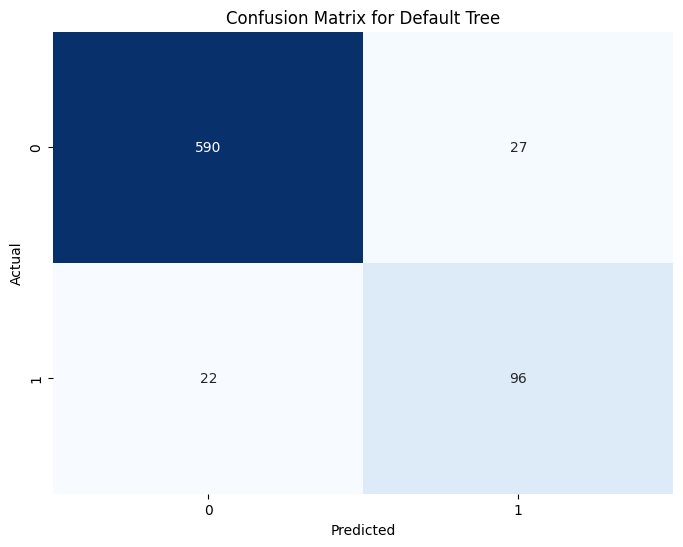

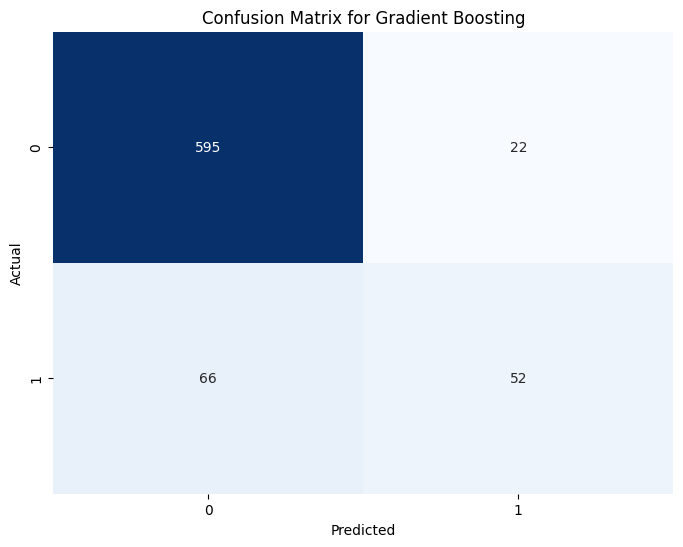

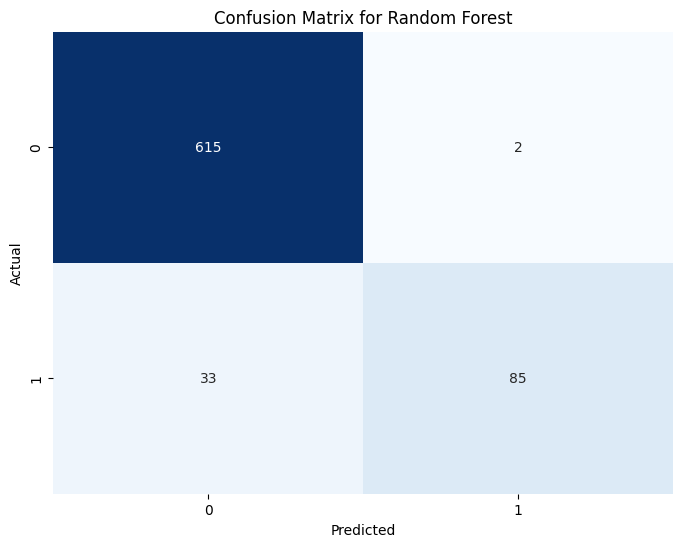

In [ ]:
#We create a function to obtain the plot of the confusion matrices of the models
def plot_confusion_matrix(conf_matrix, title): #arguments are the confusion matrix and the title of the plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False) #We create a heatmap to represent the confusion matrices
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#Get the plots of the confusion matrices for the three models
plot_confusion_matrix(conf_matrix_tree, "Confusion Matrix for Default Tree")
plot_confusion_matrix(conf_matrix_gbc, "Confusion Matrix for Gradient Boosting")
plot_confusion_matrix(conf_matrix_rfc, "Confusion Matrix for Random Forest")

### **6. OPTIONAL: FEATURE SELECTION FOR KNN**

**Using now the optimal number of neighbors found when doing HPO, use grid-search for selecting the optimal number of features (using SelectKBest). Is the number of features selected much smaller than the original number? Which are the most important features?**

For this final part of the project, we will try to select the best features for the KNN algorithm, in order to obtain the best performance from the information of a reduced subset of variables, which would significantly reduce the computational cost, as well as give an indication of the most important information when assessing the risk of burnout in a worker.

To achieve this, grid search will be used, and the hyperparameters of the model will be set to the ones obtained for the best KNN model previously fit, that is the number of neighbors is set to 3 and the weights is set to *distance*.

To select the $k$ best features, the function *SelectKBest* will be used. It is a feature selection technique used to select the best $k$ features based on their statistical significance. When applied in a machine learning pipeline, it helps improve the model's performance by reducing dimensionality and selecting the most relevant features. This can be particularly useful because the terformance of KNN models can be sensitive to irrelevant or redundant features. Upon providing a scoring function to measure the relevance of each feature with respect to the target variable, the method evaluates each feature independently and assigns it a score, and it retains the features with the top $k$ scores. Through a grid search of a given set of values for $k$, they will all be tried to see which $k$ gives the best subset of size $k$ that returns the best results in the train set.


In [ ]:
# Create the pipeline using SelectKBest
knn_kbest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('selectkbest', SelectKBest(score_func=f_classif)),
    ('classifier', KNeighborsClassifier(n_neighbors=3, weights='distance'))
])

# Define grid search
param_grid_kbest = {'selectkbest__k': [5, 10, 15, 20, 25, 'all']}

# Create the GridSearchCV object
grid_search_kbest = GridSearchCV(knn_kbest, param_grid=param_grid_kbest, cv=inner, scoring='balanced_accuracy', n_jobs=-1)

# Fit the model and get the time
start_time = time.time()
grid_search_kbest.fit(X_train, y_train)
end_time = time.time()

grid_search_kbest_time = end_time - start_time

# Get the best parameters and best score
best_params_kbest = grid_search_kbest.best_params_
best_score_kbest = grid_search_kbest.best_score_

print(f'Best parameters for KNN with SelectKBest: {best_params_kbest}')
print(f'Best cross-validation balanced accuracy for KNN with SelectKBest: {best_score_kbest}')
print(f'Training Time for Grid Search on KNN with SelectKBest: {grid_search_kbest_time} seconds')

Best parameters for KNN with SelectKBest: {'selectkbest__k': 10}
Best cross-validation balanced accuracy for KNN with SelectKBest: 0.8327821285419318
Training Time for Grid Search on KNN with SelectKBest: 8.555722713470459 seconds


We have obtained that the best number of covariates to take into account for this problem is of just 10, an the balanced accuracy obtained on the train set through cross validation was 83.28 %, which is an improvement over the one obtained for the KNN model with the same hyperparameters but taking into account all the covariates, with a value of 77.24 %. However, the training time of this model is also higher than the one for the KNN model with all variables, around 3 times the time for the latter model.

Let's now see which are the most important variables and how much the number of variables has been reduced.

In [ ]:
# Get the selected features of the model
selected_features = grid_search_kbest.best_estimator_.named_steps['selectkbest'].get_support(indices=True)

#Get all the features (the non ordinal categorical variables with n categories were enconded into n binary variables)
feature_names = (
    num_var +
    list(grid_search_kbest.best_estimator_.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_var)) +
    ord_var
)

#Get the name of the selected features
selected_feature_names = [feature_names[i] for i in selected_features]

print(f'Selected Features: {selected_feature_names}')
print(f'Number of Selected Features: {len(selected_feature_names)}')
print(f'Original Number of Features: {len(feature_names)}')


Selected Features: ['hrs', 'Age', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'EducationField_Human Resources', 'MaritalStatus_Single', 'JobSatisfaction', 'EnvironmentSatisfaction']
Number of Selected Features: 10
Original Number of Features: 46


The list *Selected Features* contains the names of the 10 most important variables for the model from this dataset. Notice that the non ordinal categorical variables, as they had gone through one-hot encoding, had been unfolded into as many binary variables as different categories the variable has. That is, if one of this variables had three different categories, it will be transformed into three binary variables for each of those categories, with value 1 if an individual belongs to that class and 0 if he doesn't.

Due to this, the number of total features when appyling the model is much higher than for the original variables that had been seen during the EDA, being this number 46. It can be seen that this last model was able to find a much smaller subset, of just 10 features, that gave a better result. It is important to note that, in the case of non ordinal categorical variables, maybe the information of just one of its classes (whether the individual belongs to it or not) is relevant, not the precise information of all the classes. This is for example the case of the original variable Education Field, for which it is only relevant whether the individual studied Human Resources or not.

The most important features are then the following:

*Hours*, *Age*, *Total Working Years*, *Years at Company*, *Years with Current Manager*, *Business Travel (Travel Frequently)*, *Education Field (Human Resources)*, *Marital Status (Single)*, *Job Satisfaction* and *Environment Satisfaction*.